## Generating images using DALL-E
In this notebook we will demonstrate how to ask openAI's DALL-E model to generate some images. Depending on what we request and how the model was trained, the results may be more or less appropriate. We will again use a small helper function to return the image directly.

Read more:
* [openAI image generation documentation](https://platform.openai.com/docs/guides/images/usage)

In [1]:
import openai
from skimage.io import imread, imshow
from numpy import random
from matplotlib import pyplot as plt

In [2]:
def prompt_image(message:str, width:int=1024, height:int=1024, model='dall-e-3'):
    client = openai.OpenAI()
    response = client.images.generate(
      prompt=message,
      model=model,
      n=1,
      size=f"{width}x{height}"
    )
    image_url = response.data[0].url
    image = imread(image_url)
    
    return image

When generating scientific images, they may, or may not be a proper representation. Presumably, DALL-E was trained on many natural images (showing cars, trees, houses, etc.) and not so many images of cells.

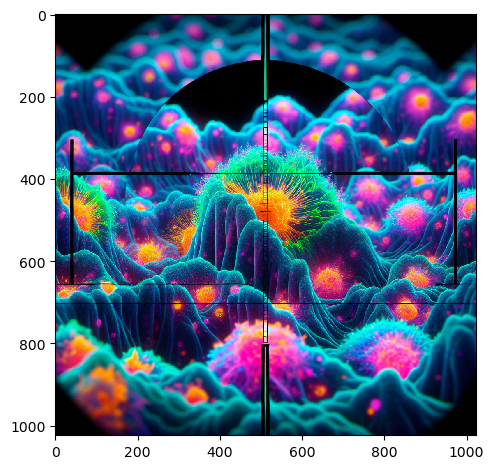

In [3]:
nuclei = prompt_image('an image of 100 nuclei in a fluorescence microscopy image')
imshow(nuclei)

Maybe, generating images of histological slices is more promising.

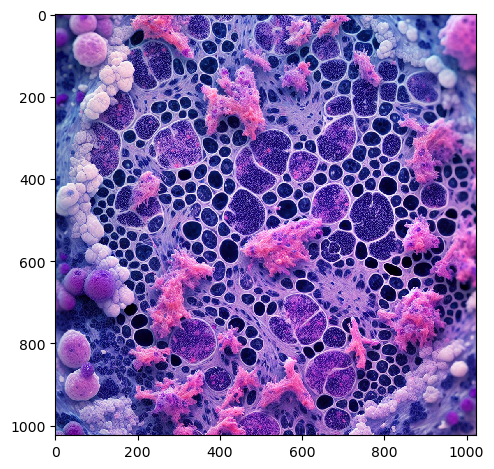

In [4]:
histology = prompt_image('a histology image of lung cancer cells and some healthy tissue')
imshow(histology)

In some cases, Dall-E 2 produces more realistic output.

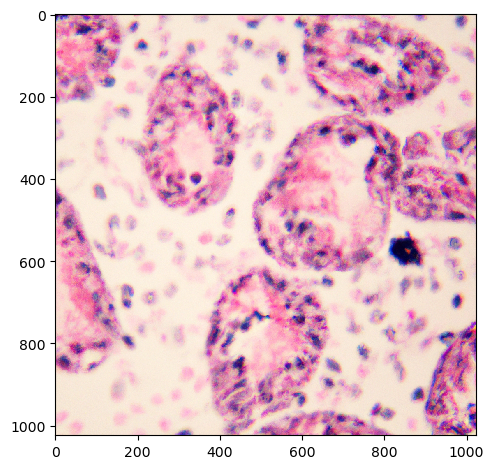

In [5]:
histology = prompt_image('a histology image of lung cancer cells and some healthy tissue',
                        model='dall-e-2')
imshow(histology)

## Exercise
Evaluating generated images is an active research field. One approach is to present readers real images and generated images asking them to identify which are real. In the following list of four images of cats sitting next to microscopes, one cat is real. Which one? Why?

In [6]:
cat_microscope_prompt = """
Image of a cat sitting behind a microscope.
Both are on a brown floor in front of a white wall.
The cat is mostly white and has some black dots.
The cat sits straight.
The cat is a bit larger than the microsope.
"""

In [7]:
images = [imread('../../data/real_cat.png')]
for _ in range(3):
    images.append(prompt_image(cat_microscope_prompt))

In [8]:
random.shuffle(images)

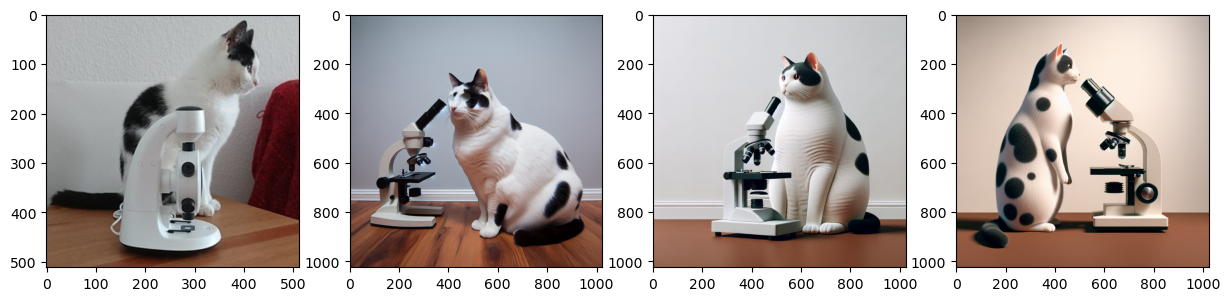

In [9]:
fix, ax = plt.subplots(1,len(images), figsize=(15,15))
for i, image in enumerate(images):
    ax[i].imshow(image)

Run the same image generation using Dall-E 2 and compare the results visually.